In [7]:
from torchvision import datasets, transforms
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
import helper

In [8]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [9]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [14]:
epochs = 30 
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        # training pass
        optimizer.zero_grad()
        output = model(images)
        # calculate error by comparing output and actual label
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        # after for loop completion, run else part;
    else:
        # training part
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.554..  Test Loss: 0.568..  Test Accuracy: 0.796
Epoch: 2/30..  Training Loss: 0.532..  Test Loss: 0.548..  Test Accuracy: 0.805
Epoch: 3/30..  Training Loss: 0.514..  Test Loss: 0.533..  Test Accuracy: 0.809
Epoch: 4/30..  Training Loss: 0.497..  Test Loss: 0.517..  Test Accuracy: 0.812
Epoch: 5/30..  Training Loss: 0.484..  Test Loss: 0.507..  Test Accuracy: 0.816
Epoch: 6/30..  Training Loss: 0.472..  Test Loss: 0.497..  Test Accuracy: 0.820
Epoch: 7/30..  Training Loss: 0.462..  Test Loss: 0.499..  Test Accuracy: 0.821
Epoch: 8/30..  Training Loss: 0.452..  Test Loss: 0.483..  Test Accuracy: 0.826
Epoch: 9/30..  Training Loss: 0.444..  Test Loss: 0.475..  Test Accuracy: 0.831
Epoch: 10/30..  Training Loss: 0.436..  Test Loss: 0.467..  Test Accuracy: 0.831
Epoch: 11/30..  Training Loss: 0.429..  Test Loss: 0.463..  Test Accuracy: 0.833
Epoch: 12/30..  Training Loss: 0.422..  Test Loss: 0.457..  Test Accuracy: 0.837
Epoch: 13/30..  Training Loss: 0.416.

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

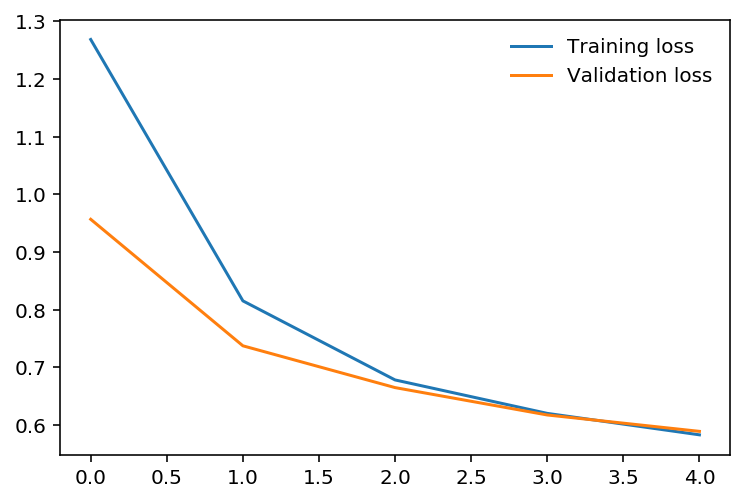

In [13]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)